Replicating fastai caravana challenge notebook for datascience bowl

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
import sys 

In [12]:
sys.path.append('../../../fastai/')

In [13]:
from utility.utils import *

In [14]:
from fastai.conv_learner import *
from fastai.dataset import *

from pathlib import Path
import json
torch.cuda.set_device(1)

RuntimeError: cuda runtime error (35) : CUDA driver version is insufficient for CUDA runtime version at torch/csrc/cuda/Module.cpp:88

In [ ]:
PATH = Path('../data/ds_bowl_2018/')
list(PATH.iterdir())

In [13]:
CSV_DN = 'csv'
TRAIN_DN = 'full_data' 

In [66]:
CSV_FILES = list((PATH/CSV_DN).iterdir())

In [67]:
masks_csv = pd.read_csv(CSV_FILES[1])
masks_csv.head()

,ImageId,EncodedPixels
0,00071198d059ba7f5914a526d124d28e6d010c92466da2...,6908 1 7161 8 7417 8 7672 9 7928 9 8184 9 8440...
1,00071198d059ba7f5914a526d124d28e6d010c92466da2...,36269 7 36523 11 36778 13 37033 15 37288 17 37...
2,00071198d059ba7f5914a526d124d28e6d010c92466da2...,19919 6 20174 8 20429 10 20685 11 20941 12 211...
3,00071198d059ba7f5914a526d124d28e6d010c92466da2...,18671 6 18926 8 19181 9 19436 10 19691 11 1994...
4,00071198d059ba7f5914a526d124d28e6d010c92466da2...,40158 3 40413 5 40669 5 40925 5 41182 3


In [68]:
NUCLEI_ID = '58406ed8ef944831c413c3424dc2b07e59aef13eb1ff16acbb3402b38b5de0bd'

In [69]:
list((PATH/TRAIN_DN).iterdir())[:5]

[PosixPath('../data/ds_bowl_2018/full_data/58406ed8ef944831c413c3424dc2b07e59aef13eb1ff16acbb3402b38b5de0bd'),
 PosixPath('../data/ds_bowl_2018/full_data/8a65e41c630d85c0004ce1772ff66fbc87aca34cb165f695255b39343fcfc832'),
 PosixPath('../data/ds_bowl_2018/full_data/c9f305be17312bdb9530fb4f1adc6d29730ddbe0e74730cbf031de174bf437b7'),
 PosixPath('../data/ds_bowl_2018/full_data/5908488d940e846cc121c768758da9b1bd5b9922417e20c9101a4e254fa98af8'),
 PosixPath('../data/ds_bowl_2018/full_data/2f929b067a59f88530b6bfa6f6889bc3a38adf88d594895973d1c8b2549fd93d')]

In [70]:
NUCLEI_IDS = [str(TRAIN_DIR).split('/')[-1] for TRAIN_DIR in list((PATH/TRAIN_DN).iterdir())]

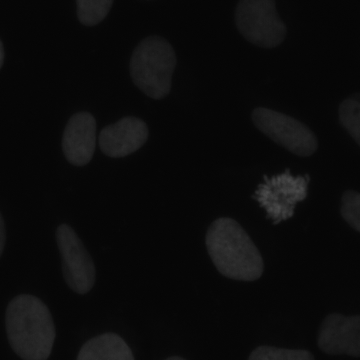

In [71]:
Image.open(PATH/TRAIN_DN/f'{NUCLEI_ID}/images/{NUCLEI_ID}.png')

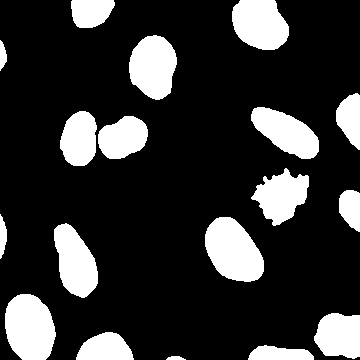

In [72]:
Image.open(PATH/TRAIN_DN/f'{NUCLEI_ID}/one_mask.png')

In [73]:
ims = [open_image(PATH/TRAIN_DN/f'{NUCLEI_ID}/images/{NUCLEI_ID}.png')
       for NUCLEI_ID in NUCLEI_IDS[:16]]

In [14]:
def show_img(im, figsize=None, ax=None):
    if not ax: fig,ax = plt.subplots(figsize=figsize)
    ax.imshow(im)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    return ax

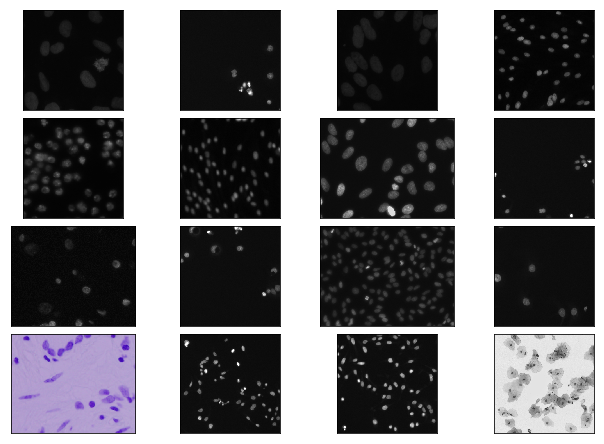

In [75]:
fig, axes = plt.subplots(4, 4, figsize=(9, 6))
for i,ax in enumerate(axes.flat): show_img(ims[i], ax=ax)
plt.tight_layout(pad=0.1)

In [76]:
# TOTAL NUMBER OF IMAGES WITH MASK LABELS
n = len(list((PATH/TRAIN_DN).iterdir()))
n

670

### Resize and Convert

In [15]:
TRAIN_DN = 'full_data' 

In [16]:
(PATH/'train_masks_png').mkdir(exist_ok=True)

In [17]:
TRAIN_DIRS = list((PATH/TRAIN_DN).iterdir())

In [54]:
MASK_FN = [str(list(TRAIN_DIR.iterdir())[0]) for TRAIN_DIR in TRAIN_DIRS]

In [56]:
MASK_FN[0]

'../data/ds_bowl_2018/full_data/e4537e7893e631f3ba6ae5b1023e24b233c78249a31c2f5e561f6c4cad88fcf6/one_mask.png'

In [57]:
def copy_masks(fn):
    NUCLEI_DN = fn.split('/')[-2]
    Image.open(fn).save(PATH/'train_masks_png'/f'{NUCLEI_DN}.png')

In [58]:
with ThreadPoolExecutor(8) as e: e.map(copy_masks, MASK_FN)

In [59]:
(PATH/'train_masks-256').mkdir(exist_ok=True)

In [60]:
def resize_mask(fn):
    Image.open(str(fn)).resize((256,256)).save((fn.parent.parent)/'train_masks-256'/fn.name)

files = list((PATH/'train_masks_png').iterdir())
with ThreadPoolExecutor(8) as e: e.map(resize_mask, files)

In [61]:
(PATH/'train-256').mkdir(exist_ok=True)

In [62]:
TRAIN_DIRS

[PosixPath('../data/ds_bowl_2018/full_data/e4537e7893e631f3ba6ae5b1023e24b233c78249a31c2f5e561f6c4cad88fcf6'),
 PosixPath('../data/ds_bowl_2018/full_data/c00ae67f72816daee468474026e30705003b2d3501f123579a4f0a6366b66aa1'),
 PosixPath('../data/ds_bowl_2018/full_data/ef3ef194e5657fda708ecbd3eb6530286ed2ba23c88efb9f1715298975c73548'),
 PosixPath('../data/ds_bowl_2018/full_data/d2815f2f616d92be35c7e8dcfe592deec88516aef9ffc9b21257f52b7d6d0354'),
 PosixPath('../data/ds_bowl_2018/full_data/7f34dfccd1bc2e2466ee3d6f74ff05821a0e5404e9cf2c9568da26b59f7afda5'),
 PosixPath('../data/ds_bowl_2018/full_data/e9b8ad127f2163438b6236c74938f43d7b4863aaf39a16367f4af59bfd96597b'),
 PosixPath('../data/ds_bowl_2018/full_data/0280fa8f60f6bcae0f97d93c28f60be194f9309ff610dc5845e60455b0f87c21'),
 PosixPath('../data/ds_bowl_2018/full_data/9cdac2870cfe65b6cb61bd151020068a3b427118a27343767b07ea39483fee32'),
 PosixPath('../data/ds_bowl_2018/full_data/60cb718759bff13f81c4055a7679e81326f78b6a193a2d856546097c949b20ff'),
 

In [63]:
IMAGE_FN = [str(list((list(TRAIN_DIRS[i].iterdir())[3]).iterdir())[0]) for i in range(len(TRAIN_DIRS))]

In [64]:
IMAGE_FN[0]

'../data/ds_bowl_2018/full_data/e4537e7893e631f3ba6ae5b1023e24b233c78249a31c2f5e561f6c4cad88fcf6/images/e4537e7893e631f3ba6ae5b1023e24b233c78249a31c2f5e561f6c4cad88fcf6.png'

In [65]:
def resize_img(fn):
    Image.open(fn).resize((256,256)).save((PATH)/'train-256'/fn.split('/')[-1])

In [66]:
with ThreadPoolExecutor(8) as e: e.map(resize_img, IMAGE_FN)

### Dataset

In [21]:
TRAIN_DN = 'train-256'
MASKS_DN = 'train_masks-256'
sz = 256
bs = 2

In [7]:
TRAIN_IMG = list((PATH/TRAIN_DN).iterdir())
TRAIN_MASK = list((PATH/MASKS_DN).iterdir())

NameError: name 'PATH' is not defined

In [8]:
open_image(TRAIN_IMG[0]).shape

NameError: name 'TRAIN_IMG' is not defined

In [70]:
ims = [open_image(f'{str(TRAIN_IMG[i])}') for i in range(16)]
im_masks = [open_image(f'{str(TRAIN_MASK[i])}') for i in range(16)]

In [23]:
def show_img(im, figsize=None, ax=None, alpha=1):
    if not ax: fig,ax = plt.subplots(figsize=figsize)
    ax.imshow(im, alpha=alpha)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    return ax

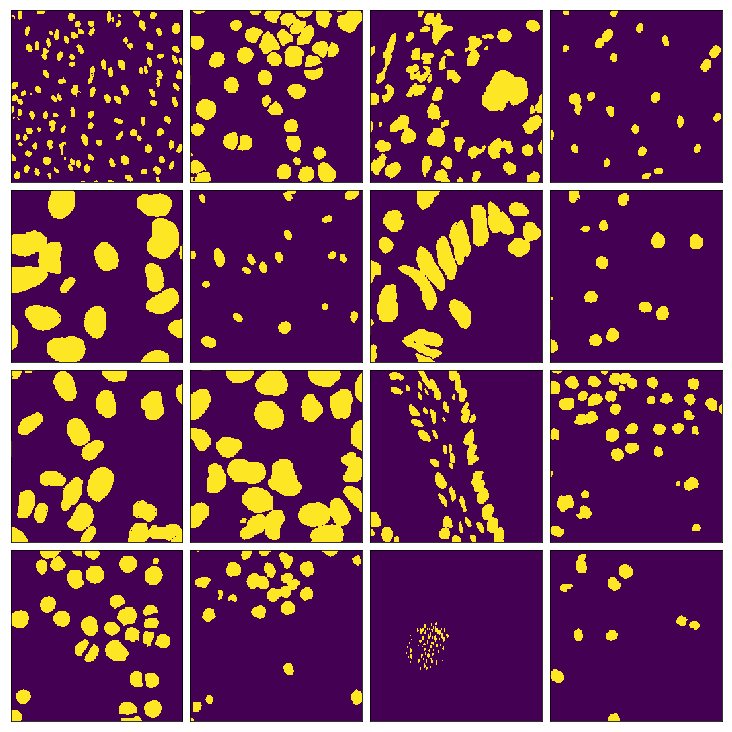

In [72]:
fig, axes = plt.subplots(4, 4, figsize=(10, 10))
for i,ax in enumerate(axes.flat):
    ax = show_img(ims[i], ax=ax)
    show_img(im_masks[i][...,0], ax=ax, alpha=1)
plt.tight_layout(pad=0.1)

### start here

In [8]:
TRAIN_DN = 'train-256'
MASKS_DN = 'train_masks-256'
sz = 256
bs = 4

In [9]:
class MatchedFilesDataset(FilesDataset):
    def __init__(self, fnames, y, transform, path):
        self.y=y
        assert(len(fnames)==len(y))
        super().__init__(fnames, transform, path)
    def get_y(self, i): return open_image(os.path.join(self.path, self.y[i]))
    def get_c(self): return 0

In [10]:
from dataset.validation import *

In [11]:
classes = pd.read_csv('classes.csv')
train_dirs, valid_dirs = get_stratified_valid_dirs(classes, seed=17)

In [12]:
trn_dn = '../data/ds_bowl_2018/' + TRAIN_DN + '/'
msk_dn = '../data/ds_bowl_2018/' + MASKS_DN + '/'

In [13]:
trn_x = ['train-256/' + train_fn + '.png' for train_fn in train_dirs]
val_x = ['train_masks-256/' + valid_fn + '.png' for valid_fn in valid_dirs]
trn_y = ['train-256/' + train_fn + '.png' for train_fn in train_dirs]
val_y = ['train_masks-256/' + valid_fn + '.png' for valid_fn in valid_dirs]

In [14]:
aug_tfms = [RandomRotate(4, tfm_y=TfmType.CLASS),
            RandomFlip(tfm_y=TfmType.CLASS),
            RandomLighting(0.05, 0.05)]

In [15]:
tfms = tfms_from_model(resnet34, sz, crop_type=CropType.NO, tfm_y=TfmType.CLASS, aug_tfms=aug_tfms)
datasets = ImageData.get_ds(MatchedFilesDataset, (trn_x,trn_y), (val_x,val_y), tfms, path=PATH)
md = ImageData(PATH, datasets, bs, num_workers=8, classes=None)

img, msk = md.trn_ds.__getitem__(0)

denorm = md.trn_ds.denorm
x,y = next(iter(md.aug_dl))
x = denorm(x)

fig, axes = plt.subplots(5, 6, figsize=(12, 10))
for i,ax in enumerate(axes.flat):
    ax=show_img(x[i], ax=ax)
    show_img(y[i], ax=ax, alpha=0.5)
plt.tight_layout(pad=0.1)

### Model

In [32]:
class Empty(nn.Module): 
    def forward(self,x): return x

models = ConvnetBuilder(resnet34, 0, 0, 0, custom_head=Empty())
learn = ConvLearner(md, models)

In [33]:
class StdUpsample(nn.Module):
    def __init__(self, nin, nout):
        super().__init__()
        self.conv = nn.ConvTranspose2d(nin, nout, 2, stride=2)
        self.bn = nn.BatchNorm2d(nout)
        
    def forward(self, x): return self.bn(F.relu(self.conv(x)))

In [34]:
flatten_channel = Lambda(lambda x: x[:,0])

In [35]:
simple_up = nn.Sequential(
    nn.ReLU(),
    StdUpsample(512,256),
    StdUpsample(256,256),
    StdUpsample(256,256),
    StdUpsample(256,256),
    nn.ConvTranspose2d(256, 1, 2, stride=2),
    flatten_channel
)

In [39]:
models = ConvnetBuilder(resnet34, 0, 0, 0, custom_head=simple_up)
learn = ConvLearner(md, models)
learn.opt_fn=optim.Adam
learn.crit=nn.BCEWithLogitsLoss()
learn.metrics=[accuracy_thresh(0.5)]

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 81%|████████  | 123/152 [00:03<00:00, 36.61it/s, loss=2.18] 


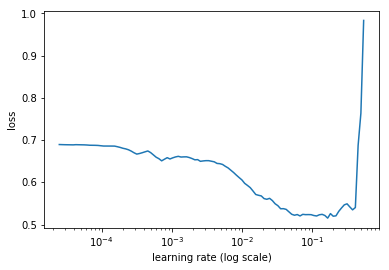

In [37]:
learn.lr_find()
learn.sched.plot()

In [40]:
learn.unfreeze()

In [41]:
lr = 0.01
learn.fit(lr,10)

HBox(children=(IntProgress(value=0, description='Epoch', max=10), HTML(value='')))

 89%|████████▉ | 135/152 [00:07<00:00, 18.56it/s, loss=0.387]

Exception in thread Thread-26:
Traceback (most recent call last):
  File "/home/qipm/anaconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/qipm/anaconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/qipm/anaconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



epoch      trn_loss   val_loss   <lambda>                    
    0      0.369154   1.333905   0.875652  
    1      0.345754   0.359104   0.87614                     
    2      0.342975   0.796115   0.745136                    
    3      0.309735   0.330974   0.875639                    
    4      0.320442   1.858639   0.875177                    
 99%|█████████▊| 150/152 [00:08<00:00, 18.37it/s, loss=0.317]


KeyboardInterrupt: 

 99%|█████████▊| 150/152 [00:20<00:00,  7.50it/s, loss=0.317]

In [25]:
py,ay = learn.predict_with_targs()

In [28]:
def show_img(im, figsize=None, ax=None, alpha=None):
    if not ax: fig,ax = plt.subplots(figsize=figsize)
    ax.imshow(im, alpha=alpha)
    ax.set_axis_off()
    return ax

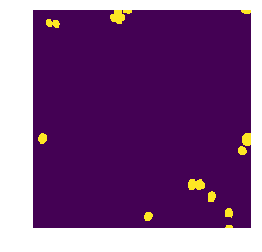

In [29]:
show_img(ay[0]);

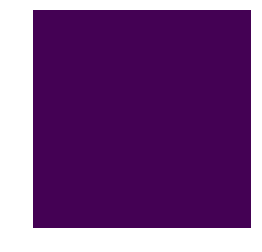

In [31]:
show_img(py[0] > 0);